
### Calculating a data-driven threshold for selecting cadidate mitochondrial proteins
#### Beyond Mitocarta - Expanding the List of Candidate Mitochondrial Proteins Using a Biological Network Approach
Dmitriy Leyfer, Jessica Fetterman

max(dddydx) 4.6697126572129894
first_inflect:  24.983355168161463
second_inflect:  -10.154195955462018
third_inflect:  4.643572328069973
Rank of discovered Mitocarta protein at the third derivative inflection point:  3064
Percent discovered Mitocarta proteins at the  3064  rank:  89.40749012735961


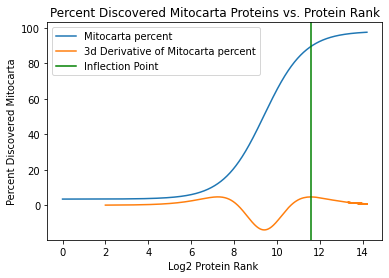

In [19]:
# Calculating derivatives of a sigmoid curve to find inflection points
import math

# %cd /directory/with/rank_pvalues_file

rank_pvalues_file = "percent_discovered_Mitocarta4curveFit.csv"
data = pd.read_csv(rank_pvalues_file)

x = data.loc[:,"P-value Rank"]
y = data.loc[:,"Percent Discovered Mitocarta Genes"]
y = peval(x,plsq[0])

x = np.log2(x)

# finding derivatives
dydx = np.diff(y) / np.diff(x)
ddydx = np.diff(dydx) / np.diff(x[1:len(x)])
dddydx = np.diff(ddydx) / np.diff(x[2:len(x)])

print ("max(dddydx)", max(dddydx))

first_inflect = max(dydx)
second_inflect = min(ddydx)
third_inflect = max(dddydx[1615:len(dddydx)])
rank_third_inflect_list = np.where(dddydx == third_inflect)[0]
rank_third_inflect = rank_third_inflect_list[0]

print("first_inflect: ", first_inflect)
print("second_inflect: ", second_inflect)
print("third_inflect: ", third_inflect)
print("Rank of discovered Mitocarta protein at the third derivative inflection point: ", rank_third_inflect)
print("Percent discovered Mitocarta proteins at the ", rank_third_inflect, " rank: ", y[rank_third_inflect+2])

plt.plot(x[0:len(x)],y, label='exact')
plt.plot(x[3:len(x)],dddydx, label='exact')
plt.ylabel("Percent Discovered Mitocarta")
plt.xlabel("Log2 Protein Rank ")
plt.title('Percent Discovered Mitocarta Proteins vs. Protein Rank')
plt.legend(['Mitocarta percent', '3d Derivative of Mitocarta percent'], loc='upper left')

plt.axvline(x = math.log2(rank_third_inflect), color = 'g', label = 'axvline - full height')
plt.legend(['Mitocarta percent', '3d Derivative of Mitocarta percent', "Inflection Point"], loc='upper left')


#### The rank_pvalues_file should be in the format:<br>
```` PvalRank 	Percent_Discovered_Mitocarta_Genes ```` <br>
&emsp; &emsp;	&emsp;1 &emsp; &emsp;	&emsp; 	&emsp; &emsp; &emsp;&emsp;0.09<br>
&emsp; &emsp;	&emsp;2 &emsp; &emsp;	&emsp; 	&emsp; &emsp; &emsp;&emsp;0.18<br>
&emsp; &emsp;	&emsp;3 &emsp; &emsp;	&emsp; 	&emsp; &emsp; &emsp;&emsp;0.18<br>

</p>
<div>
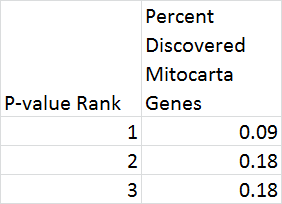
</div>
</p>
<br><br><br><br><br><br><br>

, where the percent of discovered Mitocarta proteins is calculated as <br>
[p-value rank of each Mitocarta protein rediscovered by the method], <br>
divided by <br> 
[the total number of the Mitocarta proteins.]  <br>
